#### 1次元入力 2クラス出力

In [1]:
# list
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# data generation
np.random.seed(seed=0) #乱数固定
X_min = 0
X_max = 2.5
X_n = 30
X_col = ['cornflowerblue','gray']
X = np.zeros(X_n) # input data
T = np.zeros(X_n,dtype=np.uint8) # target data
Dist_s = [0.4,0.8] # 分布の開始地点
Dist_w = [0.8,1.6] # 分布の幅
Pi = 0.5 # クラス0の比率
for n in range(X_n):
    wk = np.random.rand()
    T[n] = 0 * (wk < Pi) + 1 *(wk>= Pi) #(A)
    X[n] = np.random.rand() * Dist_w[T[n]] + Dist_s[T[n]] #(B)
    
# data show
print('X='+str(np.round(X,2)))
print('T='+str(T))


X=[1.94 1.67 0.92 1.11 1.41 1.65 2.28 0.47 1.07 2.19 2.08 1.02 0.91 1.16
 1.46 1.02 0.85 0.89 1.79 1.89 0.75 0.9  1.87 0.5  0.69 1.5  0.96 0.53
 1.21 0.6 ]
T=[1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0]


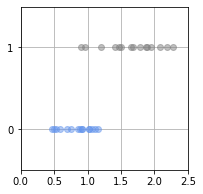

In [2]:
# データ分布表示
def show_data1(x,t):
    K = np.max(t) + 1
    for k in range(K): # (A)
        plt.plot(x[t==k],t[t==k],X_col[k],alpha=0.5,linestyle='none',marker='o') #(B)

    plt.grid(True)
    plt.ylim(-.5,1.5)
    plt.xlim(X_min,X_max)
    plt.yticks([0,1])
    
# main
fig = plt.figure(figsize=(3,3))
show_data1(X,T)
plt.show()


#### ロジスティック回帰モデル

1.25

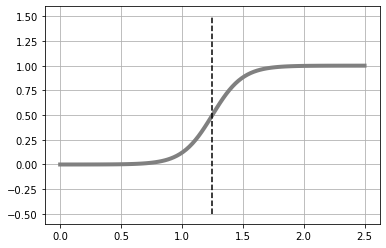

In [3]:
def logistic(x,w):
    y = 1 / (1+np.exp(-(w[0]*x + w[1])))
    return y

def show_logistic(w):
    xb = np.linspace(X_min,X_max,100)
    y = logistic(xb,w)
    plt.plot(xb,y,color='gray',linewidth=4)
    
    # 境界決定
    i = np.min(np.where(y>0.5)) # (A)
    B = (xb[i-1] + xb[i]) / 2 # (B)
    plt.plot([B,B],[-.5,1.5],color='k',linestyle='--')
    plt.grid(True)
    return B

# test
W = [8,-10]
show_logistic(W)




#### 交差エントロピ

In [4]:
def cee_logistic(w,x,t):
    y = logistic(x,w)
    cee = 0
    
    for n in range(len(y)):
        cee = cee - (t[n] * np.log(y[n]) + (1 - t[n])*np.log(1 - y[n]))
    
    cee = cee / X_n
    return cee

# test
W=[1,1]
cee_logistic(W,X,T)

1.0288191541851066

#### 平均交差エントロピ誤差の表示

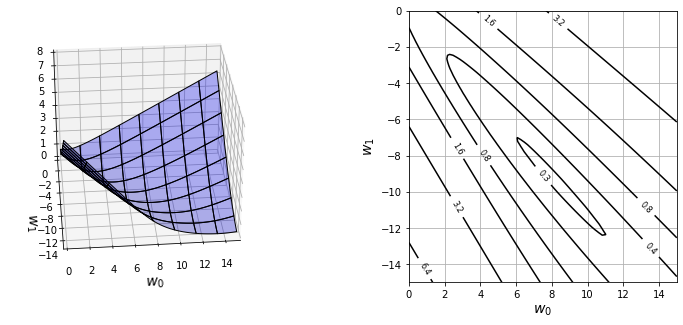

In [5]:
from mpl_toolkits.mplot3d import Axes3D

# 計算
wn = 80 # 等高線表示の解像度
w_range = np.array([[0,15],[-15,0]])
w0 = np.linspace(w_range[0,0],w_range[0,1],wn)
w1 = np.linspace(w_range[1,0],w_range[1,1],wn)
ww0,ww1 = np.meshgrid(w0,w1)
C = np.zeros((len(w1),len(w0)))
w = np.zeros(2)

for i0 in range(wn):
    for i1 in range(wn):
        w[0] = w0[i0]
        w[1] = w1[i1]
        C[i1,i0] = cee_logistic(w,X,T)

# show
plt.figure(figsize=(12,5))
plt.subplots_adjust(wspace=0.5)
ax = plt.subplot(1,2,1,projection='3d')
ax.plot_surface(ww0,ww1,C,color='blue',edgecolor='black',rstride=10,cstride=10,alpha=0.3)
ax.set_xlabel('$w_0$',fontsize=14)
ax.set_ylabel('$w_1$',fontsize=14)
ax.set_xlim(0,15)
ax.set_ylim(-15,0)
ax.set_zlim(0,8)
ax.view_init(30,-95)

plt.subplot(1,2,2)
cont = plt.contour(ww0,ww1,C,20,colors='black',levels=[0.26,0.4,0.8,1.6,3.2,6.4])
cont.clabel(fmt='%.1f',fontsize=8)
plt.xlabel('$w_0$',fontsize=14)
plt.ylabel('$w_1$',fontsize=14)
plt.grid(True)
plt.show()

#### 平均交差エントロピ誤差の微分

In [6]:
def dcee_logistic(w,x,t):
    y = logistic(x,w)
    dcee = np.zeros(2)
    
    for n in range(len(y)):
        dcee[0] = dcee[0] + (y[n] - t[n])*x[n]
        dcee[1] = dcee[1] + (y[n] - t[n])
    
    dcee = dcee / X_n
    return dcee

# test
W = [1,1]
dcee_logistic(W,X,T)

array([0.30857905, 0.39485474])

#### 勾配法による解

w0=8.18,w1=-9.38
CEE=0.25
Boundary=1.15


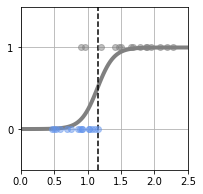

In [7]:
from scipy.optimize import minimize

# parameter search
def fit_logistic(w_init,x,t):
    res1 = minimize(cee_logistic,w_init,args=(x,t),jac=dcee_logistic,method="CG") #(A)
    return res1.x

# main
plt.figure(1,figsize=(3,3))
W_init = [1,-1]
W = fit_logistic(W_init,X,T)
print("w0={0:.2f},w1={1:.2f}".format(W[0],W[1]))
B = show_logistic(W)
show_data1(X,T)
plt.ylim(-.5,1.5)
plt.xlim(X_min,X_max)
cee = cee_logistic(W,X,T)
print("CEE={0:.2f}".format(cee))
print("Boundary={0:.2f}".format(B))
plt.show()

# 与えられた x(体重)に対して、t=1(オス)である確率：P(t=1|x) を表している
# 境界：1.15 は、P(t=1|x)=0.5 となる x(体重)

#### 2次元入力2クラス分類

In [8]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# data generation
np.random.seed(seed=1) #乱数を固定
N = 100 #データ数
K = 3 #分布の数
T3 = np.zeros((N,3),dtype=np.uint8)
T2 = np.zeros((N,2),dtype=np.uint8)
X = np.zeros((N,2))
X_range0 = [-3,3] #X0の範囲 表示用
X_range1 = [-3,3] #X1の範囲 表示用
Mu = np.array([[-.5,-.5],[.5,1.0],[1,-.5]]) #分布の中心
Sig = np.array([[.7,.7],[.8,.3],[.3,.8]]) #分布の分散
Pi = np.array([0.4,0.8,1]) #(A) 各分布への割合

for n in range(N):
    wk = np.random.rand()
    for k in range(K):
        if wk < Pi[k]:
            T3[n,k] = 1
            break
    for k in range(2):
        X[n,k] = (np.random.randn()*Sig[T3[n,:]==1,k] + Mu[T3[n,:]==1,k])

T2[:,0] = T3[:,0]
T2[:,1] = T3[:,1] | T3[:,2]


In [12]:
print(X[:5,:])
print(T2[:5,:])
print(T3[:5,:])

[[-0.14173827  0.86533666]
 [-0.86972023 -1.25107804]
 [-2.15442802  0.29474174]
 [ 0.75523128  0.92518889]
 [-1.10193462  0.74082534]]
[[0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]]
[[0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]]


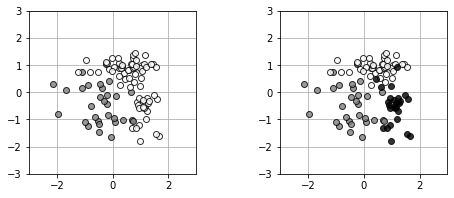

In [18]:
#data show
def show_data2(x,t):
    wk,K = t.shape
    c = [[.5,.5,.5],[1,1,1],[0,0,0]]
    
    for k in range(K):
        plt.plot(x[t[:,k] == 1,0],x[t[:,k] == 1,1],linestyle='none',markeredgecolor='black',marker='o',color=c[k],alpha=0.8)
    
    plt.grid(True)
    
# main
plt.figure(figsize=(7.5,3))
plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,1)
show_data2(X,T2)
plt.xlim(X_range0)
plt.ylim(X_range1)

plt.subplot(1,2,2)
show_data2(X,T3)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.show()


#### ロジスティック回帰モデル

In [20]:
def logistic2(x0,x1,w):
    y = 1 / (1 + np.exp(-(w[0]*x0 + w[1]*x1 + w[2])))
    return y

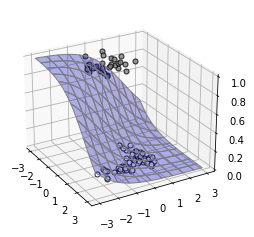

In [24]:
# model 3d show
from mpl_toolkits.mplot3d import axes3d

def show3d_logistic2(ax,w):
    xn = 50
    x0 = np.linspace(X_range0[0],X_range0[1],xn)
    x1 = np.linspace(X_range1[0],X_range1[1],xn)
    xx0,xx1 = np.meshgrid(x0,x1)
    y = logistic2(xx0,xx1,w)
    ax.plot_surface(xx0,xx1,y,color='blue',edgecolor='gray',rstride=5,cstride=5,alpha=0.3)
    
def show_data2_3d(ax,x,t):
    c = [[.5,.5,.5],[1,1,1]]
    
    for i in range(2):
        ax.plot(x[t[:,i] == 1,0],x[t[:,i] == 1,1],1 - i,marker='o',color=c[i],markeredgecolor='black',linestyle='none',markersize=5,alpha=0.8)
        
    ax.view_init(elev=25,azim=-30)

# test
Ax = plt.subplot(1,1,1,projection='3d')
W = [-1,-1,-1]
show3d_logistic2(Ax,W)
show_data2_3d(Ax,X,T2)
plt.show()

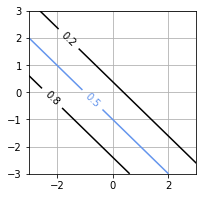

In [29]:
# モデル等高線2D表示
def show_contour_logistic2(w):
    xn = 30
    x0 = np.linspace(X_range0[0],X_range0[1],xn)
    x1 = np.linspace(X_range1[0],X_range1[1],xn)
    xx0,xx1 = np.meshgrid(x0,x1)
    y = logistic2(xx0,xx1,w)
    cont = plt.contour(xx0,xx1,y,levels=(0.2,0.5,0.8),colors=['k','cornflowerblue','k'])
    cont.clabel(fmt='%.1f',fontsize=10)
    plt.grid(True)

# test
plt.figure(figsize=(3,3))
W = [-1,-1,-1]
show_contour_logistic2(W)
plt.show()
